# PSO - 0/1 Knapsack problem
Source: https://www.programmersought.com/article/18927400398/

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from time import *


def init_x(n, d):
    """
    :param n: total number of particles
         :param d: Number of particle genes (dimension)
         :return: randomly generated population (two-dimensional list)
    """
    population = []
    for i in range(n):
        gene = []
        for j in range(d):
            a = np.random.randint(0, 2)
            gene.append(a)
        population.append(gene)
    return population


def init_v(n, d, V_max, V_min):
    """
         :param n: total number of particles
         :param d: Number of particle genes (dimension)
         :return: randomly generated population (two-dimensional list)
    """
    v = []
    for i in range (n):
        vi = []
        for j in range (d):
            a = random.random() * (V_max - V_min) + V_min
            vi.append(a)
        v.append(vi)
    return v


def fitness2(p, n, d, Data):
    
    for i in range(n):    
        features = [i for i,val in enumerate(p[i]) if val==1]
        X = Data[:, features]  # select the features 
        
        # 
        mlp = MLP(activation = 'tanh', learning_rate_init = 0.01, solver = 'sgd')
        mlp.fit()
        
    
    
    
    
    
def fitness(p, n, d, w, w_max, v, afa):
    """
         :param p: particle swarm
         :param n: the number of particles in the group
         :param d: particle dimension
         :param w: item weight list
         :param w_max: Maximum backpack capacity
         :param v: the value list of the item
         :param afa: penalty coefficient
         :return: pbest fitness list of each particle
         :return: fitweight the weight of each particle
         tips: If the total weight of the item is greater than the maximum capacity of the backpack, a penalty coefficient is introduced
    """
    fitvalue = []
    fitweight = []
    for i in range (n):
        a = 0  # Weight of each particle
        b = 0  # The value of each particle (fitness)
        for j in range(d):
            if p[i][j] == 1:
                a += w[j]
                b += v[j]
        if a > w_max:
            b = 0
            # b = b + afa * (w_max-a) # overweight
        fitvalue.append(b)
        fitweight.append(a)
    return fitvalue, fitweight


def update_pbest(p, fitvalue, pbest, px, m):
    """
         Update individual optimal
         :param p: current population
         :param fitvalue: current fitness of each particle
         :param pbest: Individual optimal before update
         :param px: Individual optimal solution before update
         :param m: number of particles
         :return: updated individual optimal value, individual optimal solution
    """
    pb = pbest
    for i in range (m):
        if fitvalue[i] > pbest[i]:
            pbest[i] = fitvalue[i]
            px[i] = p[i]
    return pb, px


def update_gbest (p, pbest, gbest, g, m):
    """
         Update the global optimal solution
         :param p: particle swarm
         :param pbest: Individual fitness (individual best)
         :param gbest: global optimal
         :param g: global optimal solution
         :param m: number of particles
         :return: gbest global optimal, the global optimal solution corresponding to g
    """
    gb=gbest
    for i in range (m):
        if pbest[i] > gb:
            gb = pbest[i]
            g = p[i]
    return gb, g


def update_v(v, x, m, n, pbest, g, c1, c2, vmax, vmin):
    """
         refresh rate 
         :param v: speed before update
         :param x: position before update
         :param m: number of particles
         :param n: particle dimension
         :param pbest: Individual optimal solution (two-dimensional list)
         :param g: global optimal solution (one-dimensional list)
         :param c1: acceleration factor
         :param c2: acceleration factor
         :param vmax: maximum speed
         :param vmin: minimum speed
         :return: Two-dimensional list of updated speeds
    """
    for i in range (m):
        a = random.random()
        b = random.random()
        for j in range (n):
            v[i][j]=v[i][j]+c1*a*(pbest[i][j]-x[i][j]) + c2*b*(g[j]-x[i][j])
            if v[i][j] < vmin:
                v[i][j] = vmin
            if v[i][j] > vmax:
                v[i][j] = vmax
    return v


def update_x(x, v, m, n):
    """
         Update x
         :param x: x before update
         :param v: updated v
         :param m: number of particles
         :param n: particle dimension
         :return: updated x
    """
    for i in range (m):
        for j in range(n):
            a = random.random()
            x[i][j] = 1/(1+math.exp(-v[i][j]))
            if x[i][j] > a:
                x[i][j] = 1
            else:
                x[i][j] = 0
    return x


In [2]:
# main()
begin_time = time()
Weight = [95,75,23,73,50,22,6,57,89,98]  # Item volume
Value = [89,59,19,43,100,72,44,16,7,64]  # Item value
N = 100  # Number of group particles
D = len(Weight)  # Particle dimension
T = 100  # The maximum number of iterations
c1 = 1.5  # Learning factor 1
c2 = 1.5  # Learning factor 2
W_max = 0.8  # Maximum inertia weight
W_min = 0.4  # Minimum inertia weight
V_max = 10  # Maximum speed
V_min = -10  # Speed ​​minimum
Weight_max = 300  # Backpack capacity


In [3]:
afa = 10  # Punishment factor
item = []  # Used to record the global optimal value of each iteration
itemg = []  # Used to record the global optimal solution of each iteration
x = init_x(N, D)  # Initialize x
v = init_v(N, D, V_max, V_min)  # Initialize v

In [4]:
fv, fw = fitness(x, N, D, Weight, Weight_max, Value, afa)  # Calculate the fitness of the first iteration
pb, px = fv, x  # Since it is the first iteration, the best individual is the current value
gb, g = update_gbest(x, pb, 0, [], N)  # In the same way, look for the global optimum of the first generation
item.append(gb)  # item list records the global optimum of each iteration
itemg.append(g)
v = update_v(v, x, N, D, px, g, c1, c2, V_max, V_min)  # Update the speed of the next generation
x = update_x(x, v, N, D)  # Update the position of the next generation

In [5]:
fv

[50,
 112,
 220,
 113,
 0,
 0,
 216,
 0,
 159,
 0,
 283,
 334,
 195,
 0,
 145,
 231,
 0,
 0,
 132,
 0,
 179,
 0,
 0,
 109,
 0,
 325,
 0,
 0,
 0,
 336,
 0,
 202,
 0,
 0,
 262,
 383,
 276,
 267,
 0,
 0,
 261,
 0,
 0,
 242,
 168,
 90,
 232,
 144,
 0,
 0,
 100,
 0,
 216,
 0,
 174,
 277,
 183,
 307,
 183,
 0,
 112,
 299,
 0,
 154,
 233,
 275,
 0,
 0,
 82,
 0,
 0,
 0,
 0,
 282,
 0,
 215,
 0,
 106,
 0,
 187,
 0,
 0,
 0,
 304,
 275,
 0,
 0,
 0,
 0,
 80,
 0,
 275,
 174,
 0,
 181,
 0,
 0,
 0,
 0,
 183]

383


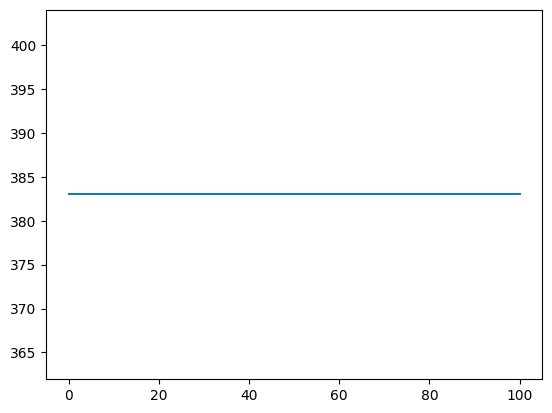

The particle swarm algorithm calculation time is: 0.3625783920288086


In [6]:
for i in range(T):
    fv, fw = fitness(x, N, D, Weight, Weight_max, Value, afa)
    pb, px = update_pbest(x, fv, pb, px, N)
    gb, g = update_gbest(x, pb, gb, g, N)
    item.append(gb)
    itemg.append(g)
    v = update_v(v, x, N, D, px, g, c1, c2, V_max, V_min)
    x = update_x(x, v, N, D)

print(gb)
plt.plot(item)
plt.show()
end_time = time()
run_time = end_time - begin_time
print('The particle swarm algorithm calculation time is:', run_time)


In [7]:
v

[[-5.003693429178171,
  1.4385284015309738,
  2.9939680451191295,
  3.6978215971386987,
  4.043712585283021,
  -3.9722168036657437,
  -2.451821821446333,
  4.31739560509009,
  5.388397770097615,
  5.317964514428195],
 [-4.008043070632121,
  2.044961912213429,
  3.229978660443817,
  2.4696073131734186,
  2.8590387253241376,
  -3.9895604545651535,
  -3.39200719737096,
  3.6408883682988664,
  4.040740310897311,
  3.618947322919567],
 [-3.472908432927917,
  -0.2260808368544146,
  4.327268955989813,
  4.199103944292389,
  3.441506623086453,
  -5.059404817707554,
  -3.649042584915082,
  3.3060702490831684,
  4.4970904966294425,
  3.1619070310390436],
 [-5.134073948266918,
  0.2552172361444372,
  5.381474157246748,
  4.098435402349089,
  3.8774926325444525,
  -3.2155997117250084,
  -1.669653403389706,
  5.339006912383574,
  6.899221915655915,
  5.212942382694646],
 [-4.1096046209982475,
  0.08673457284664954,
  3.0468902573947814,
  7.739101001440731,
  2.9154261275292925,
  -4.95969029723595

In [8]:
s = np.array([[1,2,3],[4,5,6],[7,8,9]])
s

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
h= [1,0,1,0]
L=list(np.where(h == 1)[0])
L

[]

In [11]:
s[:,L]

array([], shape=(3, 0), dtype=int64)

In [12]:
s[s==1]

array([1])

In [16]:
s.index(1)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [14]:
ss=np.where(s == 1)[0]
list(ss)

[0]

In [15]:
[i for i,val in enumerate(h) if val==1]

[0, 2]